In [1]:
import pandas as pd 
import uuid
import numpy as np
from scipy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from nfft import nfft


%matplotlib inline


In [2]:
plt.rcParams["figure.figsize"] = (10,10)


In [3]:
def clean1(filename): 
    data=pd.read_csv(filename,skiprows=4)
    data.columns=data.columns.str.strip()
    return data

def clean2(filename):
    data=pd.read_csv(filename, sep=",", header=None,skiprows=5).values
    
    
    return data
    

figsize=(20,20)

In [4]:
def plotRawDataVsTime(data):
    fig, axs = plt.subplots(8)
    fig.suptitle('Raw Voltage Versus time')
    for i in range(8): 
        axs[i].set_ylabel("Voltage")
        axs[i].set_xlabel("Time")
    axs[0].plot(data["EXG Channel 0"])
    
    axs[1].plot(data["EXG Channel 1"])
    axs[2].plot(data["EXG Channel 2"])
    axs[3].plot(data["EXG Channel 3"])
    axs[4].plot(data["EXG Channel 4"])
    axs[5].plot(data["EXG Channel 5"])
    axs[6].plot(data["EXG Channel 6"])
    axs[7].plot(data["EXG Channel 7"])
    
    #axs[0].set_ylabel("Voltage")
    
   
    

In [5]:
class OpenBCI(): 
    def __init__(self):
        self.data = { "ch01":[], "ch02":[], "ch03":[], "ch04":[], \
                      "ch05":[], "ch06":[], "ch07":[], "ch08":[] }
        self.time = []

    # def loadBCIData(self,filename) # one possible function to include

    
    def plotRawDataVsTime(data):
        fig, axs = plt.subplots(8)
        fig.suptitle('Raw Voltage Versus time')
        for i in range(8): 
            axs[i].set_ylabel("Voltage")
            axs[i].set_xlabel("Time")
        axs[0].plot(data["EXG Channel 0"])

        axs[1].plot(data["EXG Channel 1"])
        axs[2].plot(data["EXG Channel 2"])
        axs[3].plot(data["EXG Channel 3"])
        axs[4].plot(data["EXG Channel 4"])
        axs[5].plot(data["EXG Channel 5"])
        axs[6].plot(data["EXG Channel 6"])
        axs[7].plot(data["EXG Channel 7"])
        
        
        
        


    
    

In [8]:
def compute_nfft(sample_instants, sample_values):
    
    N = len(sample_instants)
    T = sample_instants[-1] - sample_instants[0]
    x = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    y = nfft(sample_instants, sample_values)
    y = 2.0 / N * np.abs(y[0:N // 2])
    return (x, y)

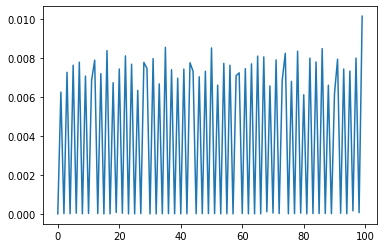

In [102]:
dt=[]
for i in range(100,200):
    dt.append(constant3[i+1]-constant3[i]) 
plt.plot(dt)

In [80]:
def raw_plot(data):
    plt.plot(data["EXG Channel 0"])
    plt.plot(data["EXG Channel 1"])
    plt.plot(data["EXG Channel 2"])
    plt.plot(data["EXG Channel 3"])
    plt.plot(data["EXG Channel 4"])
    plt.plot(data["EXG Channel 5"])
    plt.plot(data["EXG Channel 6"])
    plt.plot(data["EXG Channel 7"])


In [4]:
fs = 1000
band = (15,50) 

def notch(val, data, fs= 200):
    notch_freq_Hz = np.array([float(val)])
    for freq_Hz in np.nditer(notch_freq_Hz):
        bp_stop_Hz = freq_Hz + 3.0 * np.array([-1, 1])
        b, a = signal.butter(3, bp_stop_Hz / (fs / 2.0), 'bandstop')
        fin = data = signal.lfilter(b, a, data)
    return fin 

def bandpass(start, stop, data, fs = 200):
    bp_Hz = np.array([start, stop])
    b, a = signal.butter(5, bp_Hz / (fs / 2.0), btype='bandpass')
    return signal.lfilter(b, a, data, axis=0) 

def fft(data, fs):
    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * fs **-1), L // 2)
    yi = np.fft.fft(data)[1:]
    y = yi[range(int(L / 2))]
    return freq, abs(y)


In [21]:
def fft2(data, fs):
    N = 10000
    k = - N // 2 + np.arange(N)
    f_k = np.random.randn(N)

    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * fs **-1), L // 2)
    yi = nfft.nfft(data["EXG Channel 0"])
    y = yi[range(int(L / 2))]
    return freq, abs(y)


In [5]:
def fft_filter(data,title):
    
    channels = []
    
    bandpass_channels = []
    bandpass_notch_channels = []
    notch_channels = [] 
    fs = 1000
    band = (15,50)
    
    for i in range(8):
        channels.append(data[:,1+i].astype(np.float))
    t = len(channels[0])/fs
    time = np.linspace(0, t, len(channels[0])) 
   
    
    
    
    for i in range(len(channels)):
        notch_channels.append(notch(60,channels[i], fs = fs))
    
    #for i in range(len(notch_channels)):
        #plt.plot(time, notch_channels[i])
    
    
    for i in range(len(channels)):
        bandpass_channels.append(bandpass(band[0],band[1],channels[i], fs = fs))
    
    for i in range(len(notch_channels)):
        bandpass_notch_channels.append(bandpass(band[0],band[1],notch_channels[i], fs = fs)) 
        
        
    
    #for i in range(len(channels)):
            #freq, y = fft(channels[i], fs)
            #plt.plot(freq, y)
            #plt.ylabel("Magnintude of frequency")
            #plt.xlabel("Frequency in Hertz")
    #plt.title(title)
    #plt.ylim(0, 1e7)
    #plt.xlim(10,60) 
    
    return bandpass_notch_channels
    
    

In [74]:
def fft_filter2(data,title,t2p):
    
    channels = []
    
    bandpass_channels = []
    bandpass_notch_channels = []
    notch_channels = [] 
    fs = 1000
    band = (15,50)
    
    for i in range(8):
        channels.append(data[:,1+i].astype(np.float))
    t = len(channels[0])/fs
    time = t2p
   
    
    
    
    for i in range(len(channels)):
        notch_channels.append(notch(60,channels[i], fs = fs))
    
    #for i in range(len(notch_channels)):
        #plt.plot(time, notch_channels[i])
    
    
    for i in range(len(channels)):
        bandpass_channels.append(bandpass(band[0],band[1],channels[i], fs = fs))
    
    for i in range(len(notch_channels)):
        bandpass_notch_channels.append(bandpass(band[0],band[1],notch_channels[i], fs = fs)) 
        
        
    
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        plt.plot(freq, y)
        plt.ylabel("Magnintude of frequency")
        plt.xlabel("Frequency in Hertz")
        plt.title(title)
    plt.ylim(0, 1e7)
    plt.xlim(10,60) 
    
    return bandpass_notch_channels

In [9]:
def plot_fft(data):
    ylim=0.3e7
    bandpass_notch_channels=data
    df1=pd.DataFrame(columns=["Frequency","y"])
    df2=pd.DataFrame(columns=["Frequency","y"])
    df3=pd.DataFrame(columns=["Frequency","y"])
    df4=pd.DataFrame(columns=["Frequency","y"])
    df5=pd.DataFrame(columns=["Frequency","y"])
    df6=pd.DataFrame(columns=["Frequency","y"])
    df7=pd.DataFrame(columns=["Frequency","y"])
    df8=pd.DataFrame(columns=["Frequency","y"])
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        if(i==0):
            df1["Frequency"]=freq
            df1["y"]=y
        elif(i==1):
            df2["Frequency"]=freq
            df2["y"]=y
        elif(i==2):
            df3["Frequency"]=freq
            df3["y"]=y
        elif(i==3):
            df4["Frequency"]=freq
            df4["y"]=y
        elif(i==4):
            df5["Frequency"]=freq
            df5["y"]=y
        elif(i==5):
            df6["Frequency"]=freq
            df6["y"]=y
        elif(i==6):
            df7["Frequency"]=freq
            df7["y"]=y
        elif(i==7):
            df8["Frequency"]=freq
            df8["y"]=y
    
    fig, ax = plt.subplots(2, 4)
    fig.suptitle('Plot of FFT ')
    ax[0, 0].set_title('Sensor 1')
    ax[0, 0].plot(df1["Frequency"], df1["y"]) #row=0, col=0
    ax[0, 0].set_ylim(0,ylim)
    ax[0, 0].set_xlim(0,60)

    ax[0, 1].set_title('Sensor 2')
    ax[0, 1].plot(df2["Frequency"], df2["y"]) #row=0, col=1
    ax[0, 1].set_ylim(0,ylim)
    ax[0, 1].set_xlim(0,60)
    
    ax[0, 2].set_title('Sensor 3')
    ax[0, 2].plot(df3["Frequency"], df3["y"]) #row=0, col=1
    ax[0, 2].set_ylim(0,ylim)
    ax[0, 2].set_xlim(0,60)
    
    ax[0, 3].set_title('Sensor 4')
    ax[0, 3].plot(df4["Frequency"], df4["y"]) #row=0, col=1
    ax[0, 3].set_ylim(0,ylim)
    ax[0, 3].set_xlim(0,60)
    
    ax[1, 0].set_title('Sensor 5')
    ax[1, 0].plot(df5["Frequency"], df5["y"]) #row=1, col=0
    ax[1, 0].set_ylim(0,ylim)
    ax[1, 0].set_xlim(0,60)
    
    ax[1, 1].set_title('Sensor 6')
    ax[1, 1].plot(df6["Frequency"], df6["y"]) #row=1, col=1
    ax[1, 1].set_ylim(0,ylim)
    ax[1, 1].set_xlim(0,60)
    
    ax[1, 2].set_title('Sensor 7')
    ax[1, 2].plot(df7["Frequency"], df7["y"]) #row=1, col=0
    ax[1, 2].set_ylim(0,ylim)
    ax[1, 2].set_xlim(0,60)
    
    ax[1, 3].set_title('Sensor 8')
    ax[1, 3].plot(df8["Frequency"], df8["y"]) #row=1, col=0
    ax[1, 3].set_ylim(0,ylim)
    ax[1, 3].set_xlim(0,60)

    plt.show()

In [46]:
def get_df1(data):
    bandpass_notch_channels=data
    df1=pd.DataFrame(columns=["Frequency","y"])
    df2=pd.DataFrame(columns=["Frequency","y"])
    df3=pd.DataFrame(columns=["Frequency","y"])
    df4=pd.DataFrame(columns=["Frequency","y"])
    df5=pd.DataFrame(columns=["Frequency","y"])
    df6=pd.DataFrame(columns=["Frequency","y"])
    df7=pd.DataFrame(columns=["Frequency","y"])
    df8=pd.DataFrame(columns=["Frequency","y"])
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        if(i==0):
            df1["Frequency"]=freq
            df1["y"]=y
        elif(i==1):
            df2["Frequency"]=freq
            df2["y"]=y
        elif(i==2):
            df3["Frequency"]=freq
            df3["y"]=y
        elif(i==3):
            df4["Frequency"]=freq
            df4["y"]=y
        elif(i==4):
            df5["Frequency"]=freq
            df5["y"]=y
        elif(i==5):
            df6["Frequency"]=freq
            df6["y"]=y
        elif(i==6):
            df7["Frequency"]=freq
            df7["y"]=y
        elif(i==7):
            df8["Frequency"]=freq
            df8["y"]=y
    fig, ax = plt.subplots(2, 4)
    ax[0, 0].set_title('Sensor 1')
    ax[0, 0].plot(df1["Frequency"], df1["y"]) #row=0, col=0
    ax[0, 0].set_ylim(0,1e7)
    ax[0, 0].set_xlim(0,60)

    ax[0, 1].set_title('Sensor 2')
    ax[0, 1].plot(df2["Frequency"], df2["y"]) #row=0, col=1
    ax[0, 1].set_ylim(0,1e7)
    ax[0, 1].set_xlim(0,60)
    
    ax[0, 2].set_title('Sensor 3')
    ax[0, 2].plot(df3["Frequency"], df3["y"]) #row=0, col=1
    ax[0, 2].set_ylim(0,1e7)
    ax[0, 2].set_xlim(0,60)
    
    ax[0, 3].set_title('Sensor 4')
    ax[0, 3].plot(df4["Frequency"], df4["y"]) #row=0, col=1
    ax[0, 3].set_ylim(0,1e7)
    ax[0, 3].set_xlim(0,60)
    
    ax[1, 0].set_title('Sensor 5')
    ax[1, 0].plot(df5["Frequency"], df5["y"]) #row=1, col=0
    ax[1, 0].set_ylim(0,1e7)
    ax[1, 0].set_xlim(0,60)
    
    ax[1, 1].set_title('Sensor 6')
    ax[1, 1].plot(df6["Frequency"], df6["y"]) #row=1, col=1
    ax[1, 1].set_ylim(0,1e7)
    ax[1, 1].set_xlim(0,60)
    
    ax[1, 2].set_title('Sensor 7')
    ax[1, 2].plot(df7["Frequency"], df7["y"]) #row=1, col=0
    ax[1, 2].set_ylim(0,1e7)
    ax[1, 2].set_xlim(0,60)
    
    ax[1, 3].set_title('Sensor 8')
    ax[1, 3].plot(df8["Frequency"], df8["y"]) #row=1, col=0
    ax[1, 3].set_ylim(0,1e7)
    ax[1, 3].set_xlim(0,60)
    
    return df7

    plt.show()

In [6]:
def get_dataframes(data):
    bandpass_notch_channels=data
    df1=pd.DataFrame(columns=["Frequency","y"])
    df2=pd.DataFrame(columns=["Frequency","y"])
    df3=pd.DataFrame(columns=["Frequency","y"])
    df4=pd.DataFrame(columns=["Frequency","y"])
    df5=pd.DataFrame(columns=["Frequency","y"])
    df6=pd.DataFrame(columns=["Frequency","y"])
    df7=pd.DataFrame(columns=["Frequency","y"])
    df8=pd.DataFrame(columns=["Frequency","y"])
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        if(i==0):
            df1["Frequency"]=freq
            df1["y"]=y
        elif(i==1):
            df2["Frequency"]=freq
            df2["y"]=y
        elif(i==2):
            df3["Frequency"]=freq
            df3["y"]=y
        elif(i==3):
            df4["Frequency"]=freq
            df4["y"]=y
        elif(i==4):
            df5["Frequency"]=freq
            df5["y"]=y
        elif(i==5):
            df6["Frequency"]=freq
            df6["y"]=y
        elif(i==6):
            df7["Frequency"]=freq
            df7["y"]=y
        elif(i==7):
            df8["Frequency"]=freq
            df8["y"]=y
    
    return df1, df2, df3, df4, df5, df6, df7, df8

In [29]:
def make_vector(df1,df2,df3,df4,df5,df6,df7,df8): 
    
    
    
    
    
    vector=(get_freq_band(df1))
    sensor1=get_freq_band(df1)
    vector=vector.append(get_freq_band(df2))
    sensor2=get_freq_band(df2)
    vector=vector.append(get_freq_band(df3))
    vector=vector.append(get_freq_band(df4))
    vector=vector.append(get_freq_band(df5))
    vector=vector.append(get_freq_band(df6))
    vector=vector.append(get_freq_band(df7))
    vector=vector.append(get_freq_band(df8))
    
    
    #print(vector)
    #print("vector length is ",len(vector))
    
    sensorno=[]
    sensor="sensor"
    band=1
    counter=0
    
    for i in range(40):
        sensorno.append(sensor+str(band))
        counter+=1
        if(counter==5):
            band+=1
            counter=0
    vector["Sensor"]=sensorno
    
    exp_no=[]
    
    for i in range(40):
        exp_no.append(exp) 
        
    vector["Label"]=exp_no
        
    
    values=[]
    
    for i in range(len(vector)):
        item=vector.iloc[i]["val"]
        values.append(item)
        
    #bar1=sensor1.plot.bar(x='band', y='val', legend=False)
    #bar2=sensor2.plot.bar(x="band", y="val",legend=False)
    
    vector.head()
    
    return vector
    

In [8]:
nothing=clean2("nothing.txt")
reading=clean2("greatgatsby.txt")
calculating=clean2("calculating.txt")
classical=clean2("classic1.txt")
classicalreading=clean2("mockingbirdclassical.txt")
classicalcalculating=clean2("calculatingclassic.txt")
pop=clean2("billiejean.txt")
popreading=clean2("readingpop.txt")
popmath=clean2("popmath.txt")

In [31]:
test=do_experiment(clean2("nothing.txt"))
test.head()

,band,val,Sensor
0,Delta,3.479431e+06,sensor1
1,Theta,6.207502e+05,sensor1
2,Alpha,7.251072e+05,sensor1
3,Beta,3.361187e+05,sensor1
4,Gamma,1.923562e+05,sensor1


In [27]:
def  do_experiment(data):
    
    data=fft_filter(data,"cool")
    
    df1, df2, df3, df4, df5, df6, df7, df8=get_dataframes(data)
    
    data=make_vector(df1, df2, df3, df4, df5, df6, df7, df8)
    
    return data

In [18]:

vector1=pd.DataFrame
vector2=pd.DataFrame
vector3=pd.DataFrame
vector4=pd.DataFrame
vector5=pd.DataFrame
vector6=pd.DataFrame
vector7=pd.DataFrame
vector8=pd.DataFrame
vector9=pd.DataFrame
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(nothing,"cool"))
vector1=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,0)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(reading,"cool"))
vector2=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,1)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(calculating,"cool"))
vector3=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,2)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(classical,"cool"))
vector4=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,3)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(classicalreading,"cool"))
vector5=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,4)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(classicalcalculating,"cool"))
vector6=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,5)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(pop,"cool"))
vector7=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,6)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(popreading,"cool"))
vector8=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,7)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(popmath,"cool"))
vector9=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,8)



In [19]:
vector9.head()

,band,val,Sensor,Label
0,Delta,1.665940e+06,sensor1,8
1,Theta,2.801669e+05,sensor1,8
2,Alpha,1.547025e+05,sensor1,8
3,Beta,7.536187e+04,sensor1,8
4,Gamma,3.200352e+04,sensor1,8


In [27]:
vertical_stack = pd.concat([vector1, vector2,vector3,vector4,vector5,vector6,vector7,vector8,vector9], axis=0)
len(vertical_stack)

360

In [28]:
vertical_stack.head()

,band,val,Sensor,Label
0,Delta,3.479431e+06,sensor1,0
1,Theta,6.207502e+05,sensor1,0
2,Alpha,7.251072e+05,sensor1,0
3,Beta,3.361187e+05,sensor1,0
4,Gamma,1.923562e+05,sensor1,0


In [29]:
brain_wave_dict={"Delta":0, "Theta":1,"Alpha":2,"Beta":3, "Gamma":4}


In [30]:
vertical_stack["band"]=vertical_stack["band"].map(brain_wave_dict)


In [31]:
vertical_stack.head()

,band,val,Sensor,Label
0,0,3.479431e+06,sensor1,0
1,1,6.207502e+05,sensor1,0
2,2,7.251072e+05,sensor1,0
3,3,3.361187e+05,sensor1,0
4,4,1.923562e+05,sensor1,0


In [33]:
X=vertical_stack

In [34]:
X=X.drop("Sensor",axis=1)
X=X.drop("Label",axis=1)

,band,val
0,0,3.479431e+06
1,1,6.207502e+05
2,2,7.251072e+05
3,3,3.361187e+05
4,4,1.923562e+05


In [35]:
y=vertical_stack.Label

In [36]:
X_train, X_test, y_train, y_test,= train_test_split(X,y, test_size=0.2)

In [26]:
def clean_vector(data): 
    
    

72

In [ ]:
model=SVC(kernel="linear")
model.fit(X_train, y_train)

In [22]:

fft_vals =dummy_data["y"]

#print("vals are ")
#print(fft_vals)

# Get frequencies for amplitudes in Hz
fft_freq = dummy_data["Frequency"]

#print("freq is")

#print(fft_freq)

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix]) 


# Plot the data (using pandas here cause it's easy)

#df = pd.DataFrame(columns=['band', 'val'])
#df['band'] = eeg_bands.keys()
#df['val'] = [eeg_band_fft[band] for band in eeg_bands]
#ax = df.plot.bar(x='band', y='val', legend=False)
#ax.set_xlabel("EEG band")
#ax.set_ylabel("Mean band Amplitude")


{'Delta': (0, 4), 'Theta': (4, 8), 'Alpha': (8, 12), 'Beta': (12, 30), 'Gamma': (30, 45)}


In [17]:
def get_freq_band(data): 
    fft_vals =data["y"]

# Get frequencies for amplitudes in Hz
    fft_freq = data["Frequency"]

# Define EEG bands
    eeg_bands = {'Delta': (0, 4),
                 'Theta': (4, 8),
                 'Alpha': (8, 12),
                 'Beta': (12, 30),
                 'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

    # Plot the data (using pandas here cause it's easy)
    import pandas as pd
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
   # ax = df.plot.bar(x='band', y='val', legend=False)
   # ax.set_xlabel("EEG band")
   #ax.set_ylabel("Mean band Amplitude")
    #print(df)
    
    return df
    

In [182]:
def get_mean_bands(data): 
    
    Delta=0
    Theta=0
    Alpha=0
    Beta=0
    Gamma=0
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Delta"):
            Delta+=data.iloc[i]["val"] 
            
    Delta=Delta/8 
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Theta"):
            Theta+=data.iloc[i]["val"] 
    Theta=Theta/8
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Alpha"):
            Alpha+=data.iloc[i]["val"] 
            
    Alpha=Alpha/8
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Beta"):
            Beta+=data.iloc[i]["val"] 
            
    Beta=Beta/8 
    
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Gamma"):
            Gamma+=data.iloc[i]["val"] 
    Gamma=Gamma/8 
    
    
    print("Delta is ",Delta)
    print("Theta is ", Theta)
    print("Alpha is ", Alpha)
    print("Beta is ", Beta)
    print("Gamma is ", Gamma)
    
    
            
            
    
    

    band           val
0  Delta  8.461816e+06
1  Theta  1.034982e+06
2  Alpha  5.560714e+05
3   Beta  2.901332e+05
4  Gamma  1.420934e+05


,band,val
0,Delta,8.461816e+06
1,Theta,1.034982e+06
2,Alpha,5.560714e+05
3,Beta,2.901332e+05
4,Gamma,1.420934e+05
0,Delta,8.461816e+06
1,Theta,1.034982e+06
2,Alpha,5.560714e+05
3,Beta,2.901332e+05
4,Gamma,1.420934e+05


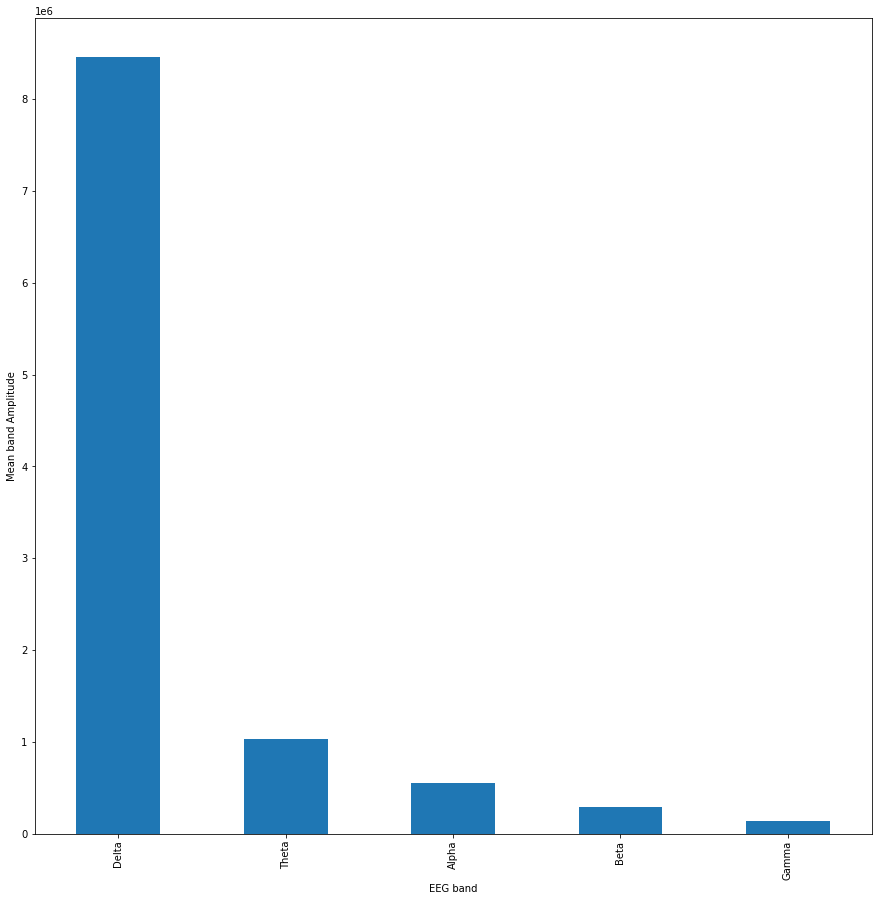